In [7]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from cgd_funcs import Funcs
from cgd import CGD

# Of the shelf solver CGD
from scipy.optimize import minimize
from numpy import linalg as la

# Plotting
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

font = {'size':15}
plt.rc('font', **font)

In [2]:
# loading the matrices
M1 = np.loadtxt('../data/M1.txt')
x0_m1 = np.loadtxt('../data/x0_m1.txt')

M2 = np.loadtxt('../data/M2.txt')
x0_m2 = np.loadtxt('../data/x0_m2.txt')

M3 = np.loadtxt('../data/M3.txt')
x0_m3 = np.loadtxt('../data/x0_m3.txt')

M4 = np.loadtxt('../data/M4.txt')
x0_m4 = np.loadtxt('../data/x0_m4.txt')

M5 = np.loadtxt('../data/M5.txt')
x0_m5 = np.loadtxt('../data/x0_m5.txt')

### Util Function for off-shelf CGD solved

In [3]:
def off_shelf_opt(matrix, vector):
    funcs = Funcs(matrix)
    res = minimize(funcs.func_, vector, method='CG', jac=funcs.func_grad_, tol=1e-5, options={'gtol': 1e-5, 'disp': False})
    fx = res.fun
    
    num_iterations = res.nit
    if res.success:
        print("Convergence reached in " + str(num_iterations) + " iterations")
    else:
        print("Convergence not reached")
    
    computed_norm = np.sqrt(-fx)
    correct_norm = la.norm(matrix, 2)
    error = abs(computed_norm - correct_norm)
    
    print("Computed Norm: " + str(computed_norm))
    print("True Norm: " + str(correct_norm))
    print("Error: " + str(error))

In [8]:
def plot_summary(error_mx, residual_mx, matrix):
    
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].plot(list(range(0,len(residual_mx))), residual_mx, label = "Residual")
    axs[1].plot(list(range(0,len(error_mx))), error_mx, label = "Error", color="orange")
    
    axs[0].legend()
    axs[1].legend()
    #axs[0].set_yscale('log')
    #axs[1].set_yscale('log')
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Residual")
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Error")
    fig.suptitle("["+matrix+"]"+"[epsilon = 1e-5] Residual and Error plot")
    #fig.suptitle(matrix_name + " " + method_name + " Residual and Error plot")

### M1 - Matrix Test

In [4]:
funcs = Funcs(M1)
# Initialize the CGD algorithm.
cgd_m1 = CGD(funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m1, 1e-5, 1000, method='FR', verboose=False)
# Run the algorithm.
residual_m1, errors_m1, result_m1 = cgd_m1.cgd()

In [5]:
len(errors_m1)

157

In [55]:
%%timeit -r 10
# Measuring running time
cgd_m1.cgd()

633 ms ± 135 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


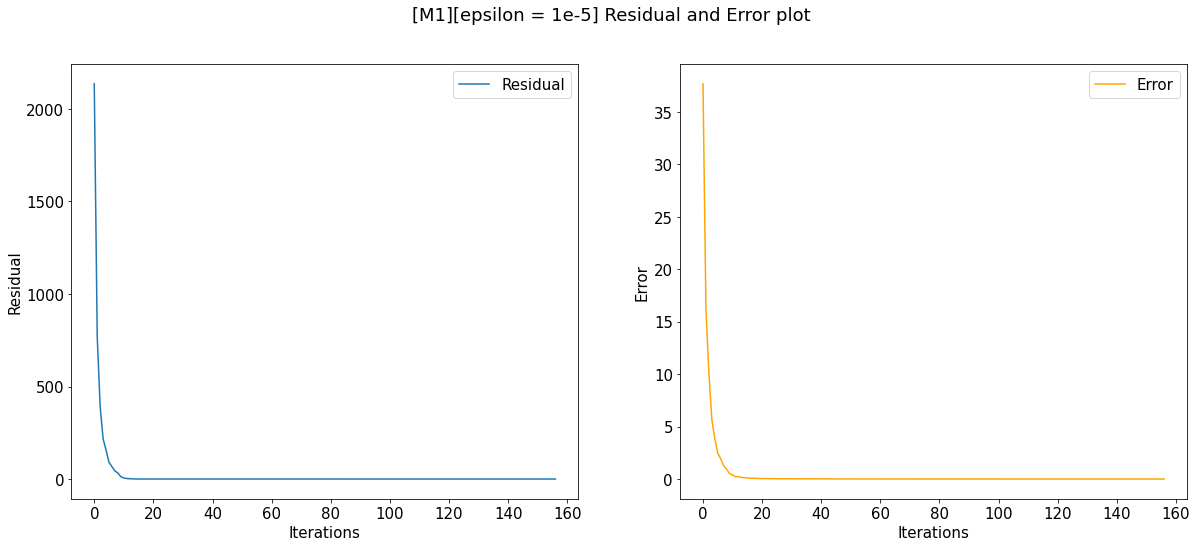

In [9]:
plot_summary(residual_m1, errors_m1, "M1")

In [57]:
%%timeit -r 10
# Norm of matrix M1
np.linalg.norm(M1, ord=2)

542 ms ± 30.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [58]:
# CGD norm result
np.sqrt(abs(result_m1))

72.40864404735305

In [59]:
# Error 
np.linalg.norm(M1, ord=2) - np.sqrt(abs(result_m1))

2.0818902157770935e-10

### M2 - Matrix Test

In [10]:
funcs = Funcs(M2)
# Initialize the CGD algorithm.
cgd_m2 = CGD(funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m2, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m2, errors_m2, result_m2 = cgd_m2.cgd()

In [11]:
len(errors_m2)

79

In [62]:
%%timeit -r 10
# Measuring running time
cgd_m2.cgd()

23.4 ms ± 1.53 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


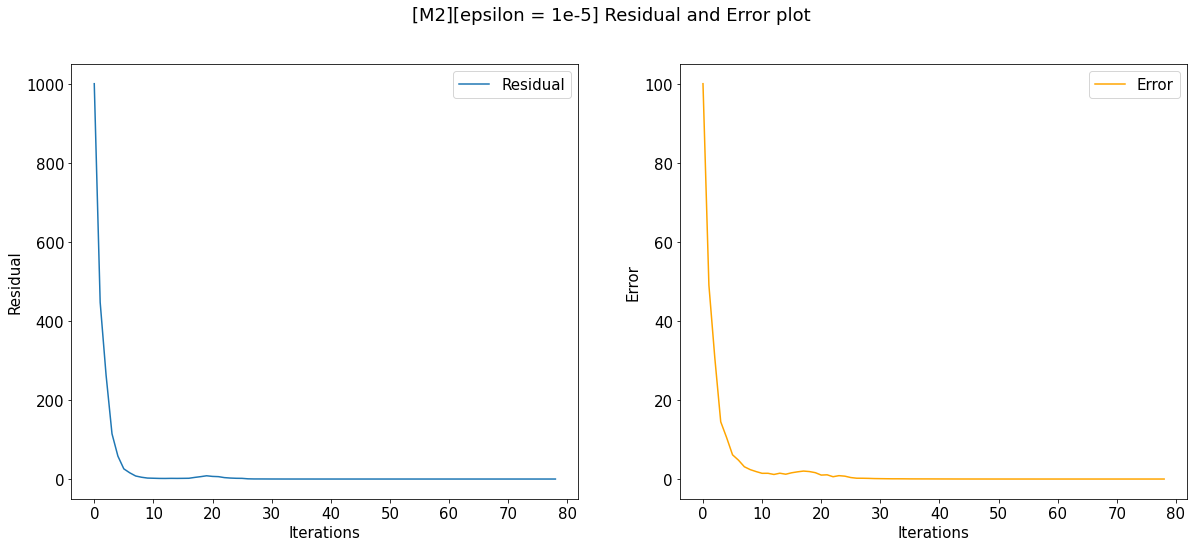

In [12]:
plot_summary(residual_m2, errors_m2, "M2")

In [64]:
%%timeit -r 10
# Norm of matrix M2
np.linalg.norm(M2, ord=2)

79.8 ms ± 2 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [65]:
# CGD norm result
np.sqrt(abs(result_m2))

109.46751097961935

In [66]:
# Error
np.linalg.norm(M2, ord=2) - np.sqrt(abs(result_m2))

1.2576606422953773e-11

### M3 - Matrix Test

In [13]:
funcs = Funcs(M3)
# Initialize the CGD algorithm.
cgd_m3 = CGD(funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m3, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m3, errors_m3, result_m3 = cgd_m3.cgd()

In [14]:
len(errors_m3)

88

In [69]:
%%timeit -r 10
# Measuring running time
cgd_m3.cgd()

336 ms ± 45.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


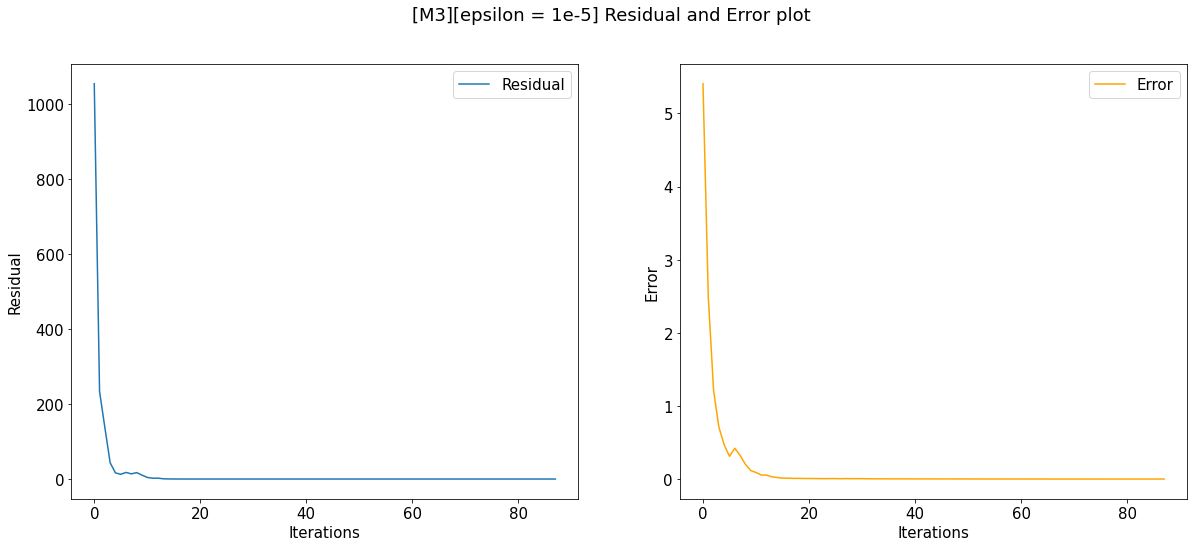

In [15]:
plot_summary(residual_m3, errors_m3, "M3")

In [95]:
%%timeit -r 10
# Norm of matrix M3
np.linalg.norm(M3, ord=2)

12.7 ms ± 2.23 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [72]:
# CGD norm result
np.sqrt(abs(result_m3))

41.06555327343059

In [73]:
# Error
np.linalg.norm(M3, ord=2) - np.sqrt(abs(result_m3))

2.1576340714091202e-10

In [74]:
off_shelf_opt(M3, x0_m3)
funcs = Funcs(M3)

Convergence reached in 36 iterations
Computed Norm: 41.065553273443705
True Norm: 41.06555327364635
Error: 2.0264678823878057e-10


In [75]:
%%timeit -r 10
# Measuring running time
minimize(funcs.func_, x0_m3, method='CG', jac=funcs.func_grad_, options={'gtol': 1e-5, 'disp': False})

394 ms ± 91.7 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### M4 - Matrix Test

In [16]:
funcs = Funcs(M4)
# Initialize the CGD algorithm.
cgd_m4 = CGD(funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m4, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m4, errors_m4, result_m4 = cgd_m4.cgd()

In [17]:
len(errors_m4)

40

In [97]:
%%timeit -r 10
# Measuring running time
cgd_m4.cgd()

14.1 ms ± 491 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


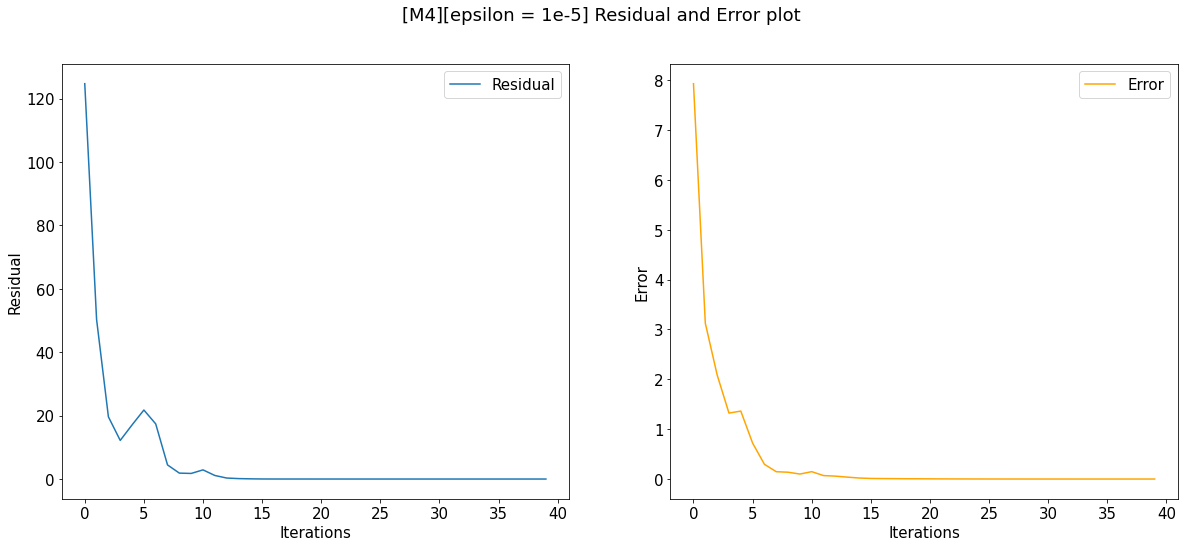

In [18]:
plot_summary(residual_m4, errors_m4, "M4")

In [100]:
%%timeit -r 10
# Norm of matrix M4
np.linalg.norm(M4, ord=2)

1.83 ms ± 401 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [81]:
# CGD norm result
np.sqrt(abs(result_m4))

19.356959368547194

In [101]:
# Error
np.linalg.norm(M4, ord=2) - np.sqrt(abs(result_m4))

3.894236044743593e-10

### M5 - Matrix Test

In [19]:
funcs = Funcs(M5)
# Initialize the CGD algorithm.
cgd_m5 = CGD(funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m5, 1e-5, 1000, method='FR', verboose=False)

# Run the algorithm.
residual_m5, errors_m5, result_m5 = cgd_m5.cgd()

In [20]:
len(errors_m5)

20

In [87]:
%%timeit -r 10
# Measuring running time
cgd_m5.cgd()

7.57 ms ± 1.46 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


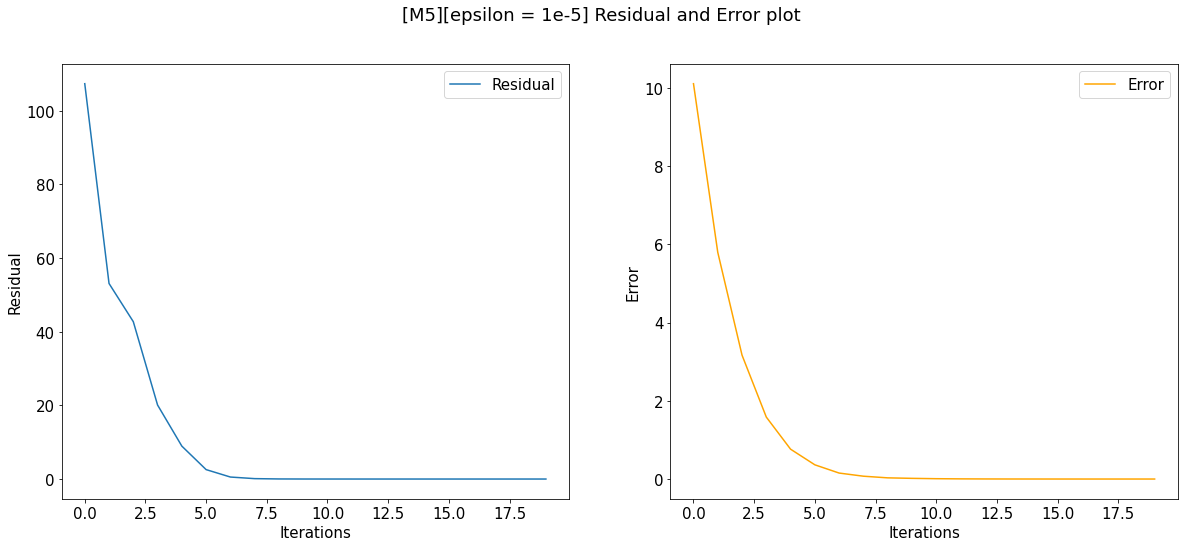

In [21]:
plot_summary(residual_m5, errors_m5, "M5")

In [89]:
%%timeit -r 10
# Norm of matrix M5
np.linalg.norm(M5, ord=2)

5.74 ms ± 691 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [90]:
np.linalg.norm(M5, ord=2)

23.62489238197046

In [91]:
# CGD norm result
np.sqrt(abs(result_m5))

23.624892381964386

In [92]:
# Error
np.linalg.norm(M5, ord=2) - np.sqrt(abs(result_m5))

6.0751403907488566e-12